<a href="https://colab.research.google.com/github/myan105/MachineLearning/blob/main/Ensembel_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 4: Ensembel methods**
**HW Due date is 03/18/2025, 23:59 pm**

Objective:
* To understand the basics of Ensembles classifiers.
* To practice building these models using sample datasets.
* To visualize model performance using different metrics.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed-2.cleveland.data to processed-2.cleveland (1).data


In [ ]:
import os
os.listdir('/content/')

['.config',
 'processed-1.cleveland.data',
 'processed-2.cleveland (1).data',
 'processed-2.cleveland.data',
 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the Cleveland Heart Disease dataset
# Replace 'path_to_your_file.data' with the actual path to your .data file
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv("/content/processed-2.cleveland.data", header=None, delimiter=',', names=names)

In [ ]:
# Preprocess dataset
data = data.replace('?', np.nan).dropna()
data['target'] = (data['target'] > 0).astype(int) #This line converts the 'HD' column into a binary attribute, where any value greater
 # than 0 is considered as presence of heart disease (1), and 0 otherwise."""

## Your code starts here
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y) #split the dataset with test_size=0.2
## Your code ends here

# Standardizing the features
## Your code starts here
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
# Print shape of standardized data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
## Your code ends here

X_train_scaled shape: (237, 13)
X_test_scaled shape: (60, 13)


Training Bagging...

Bagging - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Bagging - Confusion Matrix:
[[28  4]
 [ 6 22]]


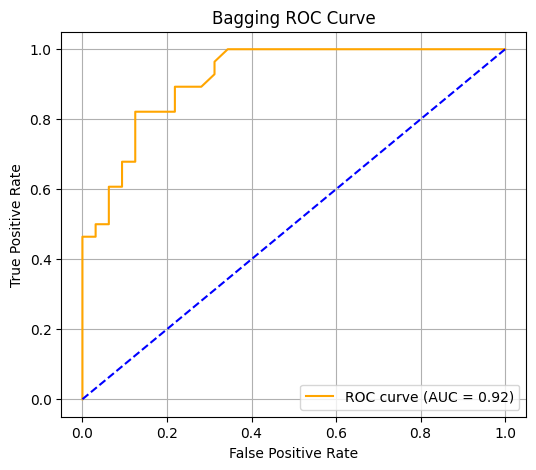

Training AdaBoost...

AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

AdaBoost - Confusion Matrix:
[[28  4]
 [ 5 23]]


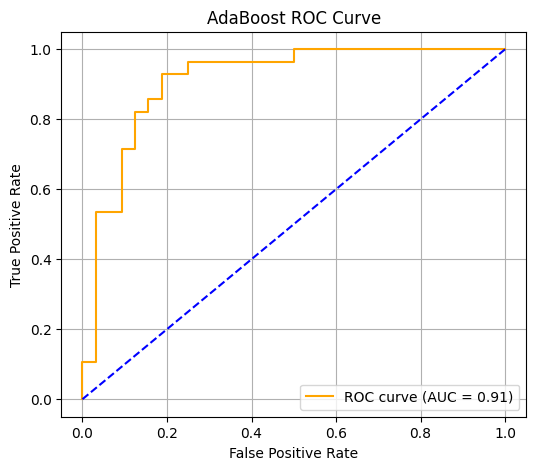

Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Random Forest - Confusion Matrix:
[[29  3]
 [ 6 22]]


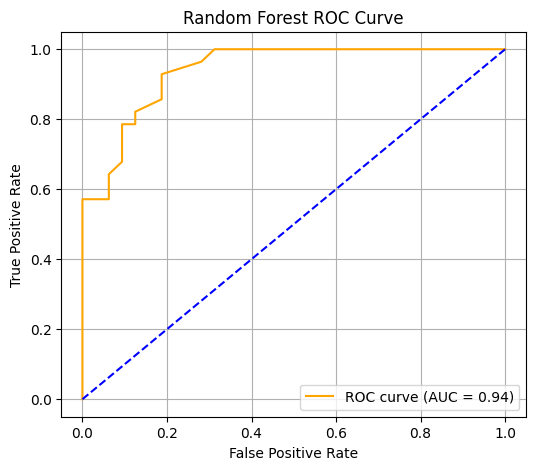

Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

XGBoost - Confusion Matrix:
[[29  3]
 [ 5 23]]


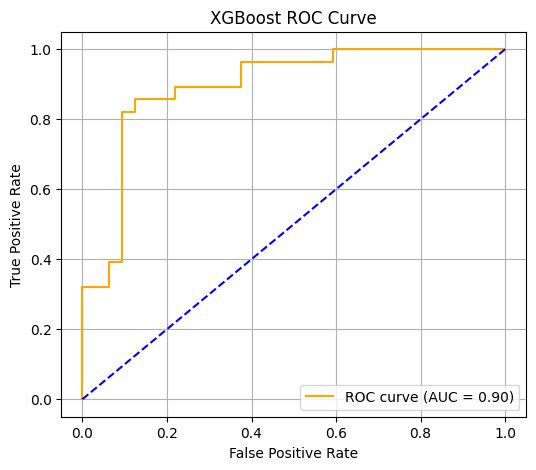

In [ ]:
# Define ensemble classifiers
classifiers = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, random_state=42)
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")
    ## Your code starts here
    #train and predict for each model
    clf.fit(X_train_scaled, y_train)
    ## Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    ## Your code ends here

    # Compute evaluation metrics
    ## Your code starts here
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"{name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    ## Your code ends here

    # Compute ROC curve
    ## Your code starts here
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ## Your code ends here

    # Plot ROC curve
    ## Your code starts here
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="orange", label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="blue")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    ## Your code ends here

The classification report generated by **scikit-learn's** classification_report function provides a comprehensive summary of the performance of a classifier for each class in a multi-class classification problem. Let's break down the different components of the classification report:

# Precision:

Precision measures the proportion of true positive predictions among all positive predictions made by the classifier for each class.
It is calculated as the ratio of true positives to the sum of true positives and false positives.
Precision is a measure of the classifier's ability to avoid false positives. A higher precision indicates fewer false positives.
#Recall (Sensitivity):

Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions that were correctly identified by the classifier for each class.
It is calculated as the ratio of true positives to the sum of true positives and false negatives.
Recall is a measure of the classifier's ability to capture all positive instances. A higher recall indicates fewer false negatives.
#F1-score:

The F1-score is the harmonic mean of precision and recall.
It provides a balance between precision and recall and is useful for comparing classifiers that have different trade-offs between false positives and false negatives.
The F1-score ranges from 0 to 1, with higher values indicating better overall performance in terms of both precision and recall.
#Support:

Support indicates the number of actual occurrences of each class in the test dataset.
For each class, the support value represents the number of samples belonging to that class in the test dataset.
Support is important for interpreting the reliability of the evaluation metrics (precision, recall, F1-score) for each class. Classes with higher support values have more reliable evaluation metrics because they are based on a larger number of samples.
#Macro Average:

The macro average (macro avg) is the average of the precision, recall, and F1-score calculated for each class separately.
It is obtained by averaging these scores across all classes, giving each class equal weight.
The macro average treats all classes equally, regardless of their size or distribution in the dataset.
It is useful for evaluating the overall performance of the classifier across multiple classes.

In summary, the classification report provides a detailed breakdown of the precision, recall, F1-score, and support for each class, as well as the macro average, allowing for a comprehensive assessment of the classifier's performance in a multi-class classification problem.

In [ ]:
# First define a single decision tree classifier
## Your code starts here
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
## Your code ends here

# Compare variance reduction by generating the classification report
print("\nVariance Reduction Comparison:")
print("Single Decision Tree - Classification Report:")
## Your code starts here
print(classification_report(y_test, y_pred_dt))
## Your code ends here

for name, clf in classifiers.items():
## Your code starts here
    print(f"\n{name} - Classification Report:")

    # Train model
    clf.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test_scaled)

    # Print classification report
    print(classification_report(y_test, y_pred))
## Your code ends here



Variance Reduction Comparison:
Single Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        32
           1       0.68      0.61      0.64        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60


Bagging - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                       

**Question:** Explain how using ensemble techniques imporve the classification results in terms of bias and variance?

**Answer:** Ensemble techniques improve classification by balancing the bias-variance tradeoff. Bagging (Ex: Random Forest) reduces variance by averaging predictions from multiple models trained on different data subsets, preventing overfitting. Boosting (Ex: AdaBoost, XGBoost) reduces bias by sequentially improving weak models, focusing on misclassified cases.

# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW4.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.